Epoch 1/20
6256/6256 [==============================] - 34s 5ms/step - loss: 0.0060 - val_loss: 0.0041
Epoch 2/20
6256/6256 [==============================] - 30s 5ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 3/20
6256/6256 [==============================] - 31s 5ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 4/20
6256/6256 [==============================] - 32s 5ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 5/20
6256/6256 [==============================] - 32s 5ms/step - loss: 0.0043 - val_loss: 0.0052
Epoch 6/20
6256/6256 [==============================] - 32s 5ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 7/20
6256/6256 [==============================] - 30s 5ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 8/20
6256/6256 [==============================] - 28s 5ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 9/20
6256/6256 [==============================] - 27s 4ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 10/20
6256/6256 [==============================] - 27s 4ms/step - l

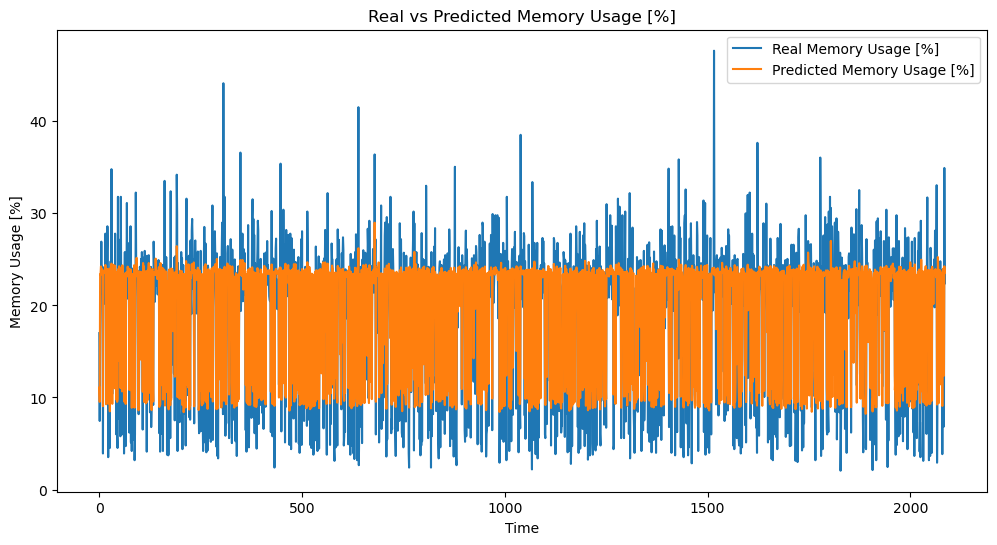

Mean Absolute Percentage Error (MAPE): 27.30%
Precision: 72.70%


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to create sequences for LSTM model
def create_sequences(data, target, time_steps=1):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data.iloc[i:(i + time_steps)].values)
        ys.append(target.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Suppress TensorFlow warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Load the CSV files
dataset = pd.read_csv('GWA-T13-materna-trace/Materna-Trace-1/01.csv', delimiter=';')

# Replace commas with dots and convert to numeric
dataset['Memory usage [%]'] = dataset['Memory usage [%]'].str.replace(',', '.').astype(float)

# Normalize the Data
mem_kb_scaler = MinMaxScaler()
mem_percent_scaler = MinMaxScaler()

dataset['Memory capacity provisioned [KB]'] = mem_kb_scaler.fit_transform(dataset[['Memory capacity provisioned [KB]']])
dataset['Memory usage [%]'] = mem_percent_scaler.fit_transform(dataset[['Memory usage [%]']])

dataset.head()

# Define features and target
features = ['Memory capacity provisioned [KB]', 'Memory usage [%]']
target = 'Memory usage [%]'

# Create sequences
time_steps = 10
X, y = create_sequences(dataset[features], dataset[target], time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Build the LSTM Model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=1, validation_data=(X_test, y_test), verbose=1)

# Evaluate the Model
predictions = model.predict(X_test)

# Rescale predictions back to original scale using the correct scaler
y_test_scaled = mem_percent_scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_scaled = mem_percent_scaler.inverse_transform(predictions)

# Debugging: Print shapes of arrays
print(f'Shape of y_test_scaled: {y_test_scaled.shape}')
print(f'Shape of predictions_scaled: {predictions_scaled.shape}')

# Ensure lengths match before creating DataFrame
if len(y_test_scaled) == len(predictions_scaled):
    # Create a DataFrame for comparison
    comparison_df = pd.DataFrame({
        'Real Memory Usage [%]': y_test_scaled.flatten(),
        'Predicted Memory Usage [%]': predictions_scaled.flatten()
    })

    # Display the first few rows of the DataFrame
    print(comparison_df.head())

    # Plot Real vs Predicted Values
    plt.figure(figsize=(12, 6))
    plt.plot(comparison_df['Real Memory Usage [%]'], label='Real Memory Usage [%]')
    plt.plot(comparison_df['Predicted Memory Usage [%]'], label='Predicted Memory Usage [%]')
    plt.title('Real vs Predicted Memory Usage [%]')
    plt.xlabel('Time')
    plt.ylabel('Memory Usage [%]')
    plt.legend()
    plt.show()

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_test_scaled.flatten() - predictions_scaled.flatten()) / y_test_scaled.flatten())) * 100

    # Calculate precision as 100 - MAPE
    precision = 100 - mape

    print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
    print(f'Precision: {precision:.2f}%')
else:
    print("Error: Lengths of y_test_scaled and predictions_scaled do not match.")



Epoch 1/20
6249/6249 [==============================] - 191s 27ms/step - loss: 0.0060 - val_loss: 0.0044
Epoch 2/20
6249/6249 [==============================] - 164s 26ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 3/20
6249/6249 [==============================] - 167s 27ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 4/20
6249/6249 [==============================] - 119s 19ms/step - loss: 0.0044 - val_loss: 0.0038
Epoch 5/20
6249/6249 [==============================] - 114s 18ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 6/20
6249/6249 [==============================] - 220s 35ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 7/20
6249/6249 [==============================] - 133s 21ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 8/20
6249/6249 [==============================] - 122s 20ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 9/20
6249/6249 [==============================] - 104s 17ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 10/20
6249/6249 [==============================

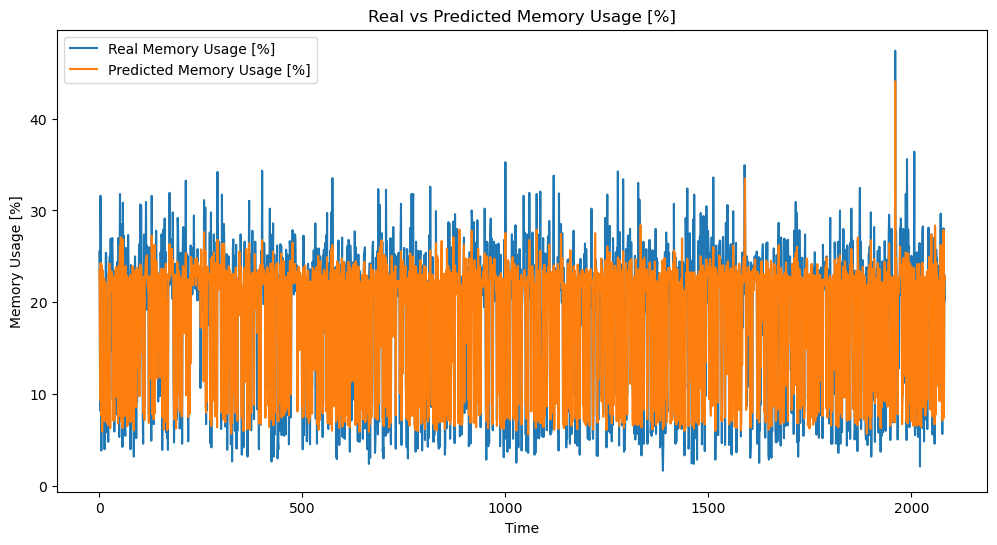

Mean Absolute Percentage Error (MAPE): 20.14%
Precision: 79.86%


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to create sequences for LSTM model
def create_sequences(data, target, time_steps=1):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data.iloc[i:(i + time_steps)].values)
        ys.append(target.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Suppress TensorFlow warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Load the CSV files
dataset = pd.read_csv('GWA-T13-materna-trace/Materna-Trace-1/01.csv', delimiter=';')

# Replace commas with dots and convert to numeric
dataset['Memory usage [%]'] = dataset['Memory usage [%]'].str.replace(',', '.').astype(float)

# Normalize the Data
mem_kb_scaler = MinMaxScaler()
mem_percent_scaler = MinMaxScaler()

dataset['Memory capacity provisioned [KB]'] = mem_kb_scaler.fit_transform(dataset[['Memory capacity provisioned [KB]']])
dataset['Memory usage [%]'] = mem_percent_scaler.fit_transform(dataset[['Memory usage [%]']])

dataset.head()

# Define features and target
features = ['Memory capacity provisioned [KB]', 'Memory usage [%]']
target = 'Memory usage [%]'

# Create sequences
time_steps = 20
X, y = create_sequences(dataset[features], dataset[target], time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Build the LSTM Model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=1, validation_data=(X_test, y_test), verbose=1)

# Evaluate the Model
predictions = model.predict(X_test)

# Rescale predictions back to original scale using the correct scaler
y_test_scaled = mem_percent_scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_scaled = mem_percent_scaler.inverse_transform(predictions)

# Debugging: Print shapes of arrays
print(f'Shape of y_test_scaled: {y_test_scaled.shape}')
print(f'Shape of predictions_scaled: {predictions_scaled.shape}')

# Ensure lengths match before creating DataFrame
if len(y_test_scaled) == len(predictions_scaled):
    # Create a DataFrame for comparison
    comparison_df = pd.DataFrame({
        'Real Memory Usage [%]': y_test_scaled.flatten(),
        'Predicted Memory Usage [%]': predictions_scaled.flatten()
    })

    # Display the first few rows of the DataFrame
    print(comparison_df.head())

    # Plot Real vs Predicted Values
    plt.figure(figsize=(12, 6))
    plt.plot(comparison_df['Real Memory Usage [%]'], label='Real Memory Usage [%]')
    plt.plot(comparison_df['Predicted Memory Usage [%]'], label='Predicted Memory Usage [%]')
    plt.title('Real vs Predicted Memory Usage [%]')
    plt.xlabel('Time')
    plt.ylabel('Memory Usage [%]')
    plt.legend()
    plt.show()

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_test_scaled.flatten() - predictions_scaled.flatten()) / y_test_scaled.flatten())) * 100

    # Calculate precision as 100 - MAPE
    precision = 100 - mape

    print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
    print(f'Precision: {precision:.2f}%')
else:
    print("Error: Lengths of y_test_scaled and predictions_scaled do not match.")

Epoch 1/20
6249/6249 [==============================] - 212s 31ms/step - loss: 0.0055 - val_loss: 0.0043
Epoch 2/20
6249/6249 [==============================] - 182s 29ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 3/20
6249/6249 [==============================] - 202s 32ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 4/20
6249/6249 [==============================] - 276s 44ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 5/20
6249/6249 [==============================] - 179s 29ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 6/20
6249/6249 [==============================] - 170s 27ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 7/20
6249/6249 [==============================] - 176s 28ms/step - loss: 0.0040 - val_loss: 0.0053
Epoch 8/20
6249/6249 [==============================] - 169s 27ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 9/20
6249/6249 [==============================] - 184s 29ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 10/20
6249/6249 [==============================] 

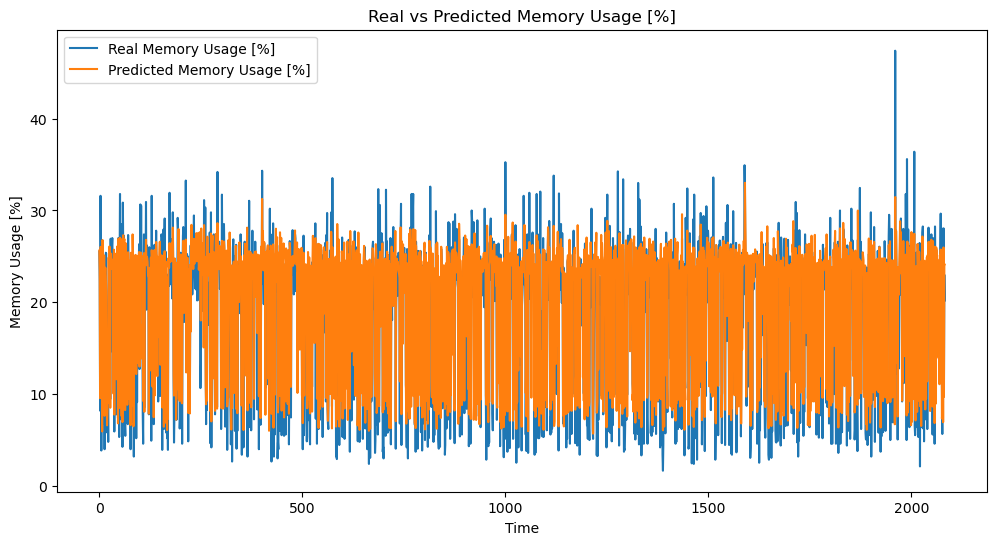

Mean Absolute Percentage Error (MAPE): 24.22%
Precision: 75.78%


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to create sequences for LSTM model
def create_sequences(data, target, time_steps=1):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data.iloc[i:(i + time_steps)].values)
        ys.append(target.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Suppress TensorFlow warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Load the CSV files
dataset = pd.read_csv('GWA-T13-materna-trace/Materna-Trace-1/01.csv', delimiter=';')

# Replace commas with dots and convert to numeric
dataset['Memory usage [%]'] = dataset['Memory usage [%]'].str.replace(',', '.').astype(float)

# Normalize the Data
mem_kb_scaler = MinMaxScaler()
mem_percent_scaler = MinMaxScaler()

dataset['Memory capacity provisioned [KB]'] = mem_kb_scaler.fit_transform(dataset[['Memory capacity provisioned [KB]']])
dataset['Memory usage [%]'] = mem_percent_scaler.fit_transform(dataset[['Memory usage [%]']])

# Define features and target
features = ['Memory capacity provisioned [KB]', 'Memory usage [%]']
target = 'Memory usage [%]'

# Create sequences
time_steps = 20
X, y = create_sequences(dataset[features], dataset[target], time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(time_steps, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=1, validation_data=(X_test, y_test), verbose=1)

# Evaluate the Model
predictions = model.predict(X_test)

# Rescale predictions back to original scale using the correct scaler
y_test_scaled = mem_percent_scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_scaled = mem_percent_scaler.inverse_transform(predictions)

# Debugging: Print shapes of arrays
print(f'Shape of y_test_scaled: {y_test_scaled.shape}')
print(f'Shape of predictions_scaled: {predictions_scaled.shape}')

# Ensure lengths match before creating DataFrame
if len(y_test_scaled) == len(predictions_scaled):
    # Create a DataFrame for comparison
    comparison_df = pd.DataFrame({
        'Real Memory Usage [%]': y_test_scaled.flatten(),
        'Predicted Memory Usage [%]': predictions_scaled.flatten()
    })

    # Display the first few rows of the DataFrame
    print(comparison_df.head())

    # Plot Real vs Predicted Values
    plt.figure(figsize=(12, 6))
    plt.plot(comparison_df['Real Memory Usage [%]'], label='Real Memory Usage [%]')
    plt.plot(comparison_df['Predicted Memory Usage [%]'], label='Predicted Memory Usage [%]')
    plt.title('Real vs Predicted Memory Usage [%]')
    plt.xlabel('Time')
    plt.ylabel('Memory Usage [%]')
    plt.legend()
    plt.show()

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_test_scaled.flatten() - predictions_scaled.flatten()) / y_test_scaled.flatten())) * 100

    # Calculate precision as 100 - MAPE
    precision = 100 - mape

    print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
    print(f'Precision: {precision:.2f}%')
else:
    print("Error: Lengths of y_test_scaled and predictions_scaled do not match.")


Epoch 1/50
196/196 [==============================] - 34s 96ms/step - loss: 0.0080 - val_loss: 0.0046 - lr: 0.0010
Epoch 2/50
196/196 [==============================] - 16s 80ms/step - loss: 0.0055 - val_loss: 0.0046 - lr: 0.0010
Epoch 3/50
196/196 [==============================] - 13s 68ms/step - loss: 0.0055 - val_loss: 0.0046 - lr: 0.0010
Epoch 4/50
196/196 [==============================] - 14s 72ms/step - loss: 0.0055 - val_loss: 0.0044 - lr: 0.0010
Epoch 5/50
196/196 [==============================] - 15s 74ms/step - loss: 0.0051 - val_loss: 0.0042 - lr: 0.0010
Epoch 6/50
196/196 [==============================] - 17s 84ms/step - loss: 0.0049 - val_loss: 0.0041 - lr: 0.0010
Epoch 7/50
196/196 [==============================] - 16s 83ms/step - loss: 0.0047 - val_loss: 0.0038 - lr: 0.0010
Epoch 8/50
196/196 [==============================] - 17s 86ms/step - loss: 0.0045 - val_loss: 0.0038 - lr: 0.0010
Epoch 9/50
196/196 [==============================] - 17s 87ms/step - loss: 0.00

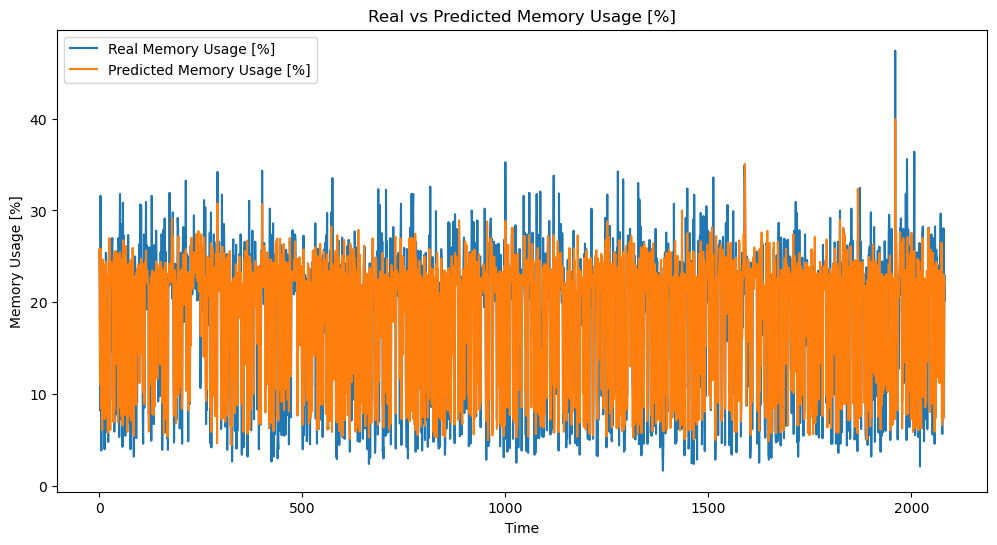

Mean Absolute Percentage Error (MAPE): 21.99%
Precision: 78.01%


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to create sequences for LSTM model
def create_sequences(data, target, time_steps=1):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data.iloc[i:(i + time_steps)].values)
        ys.append(target.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Suppress TensorFlow warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Load the CSV files
dataset = pd.read_csv('GWA-T13-materna-trace/Materna-Trace-1/01.csv', delimiter=';')

# Replace commas with dots and convert to numeric
dataset['Memory usage [%]'] = dataset['Memory usage [%]'].str.replace(',', '.').astype(float)

# Normalize the Data
mem_kb_scaler = MinMaxScaler()
mem_percent_scaler = MinMaxScaler()
dataset['Memory capacity provisioned [KB]'] = mem_kb_scaler.fit_transform(dataset[['Memory capacity provisioned [KB]']])
dataset['Memory usage [%]'] = mem_percent_scaler.fit_transform(dataset[['Memory usage [%]']])

# Define features and target
features = ['Memory capacity provisioned [KB]', 'Memory usage [%]']
target = 'Memory usage [%]'

# Create sequences
time_steps = 20
X, y = create_sequences(dataset[features], dataset[target], time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Build the LSTM Model
model = Sequential()
model.add(LSTM(100, input_shape=(time_steps, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Callback to reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[reduce_lr])

# Evaluate the Model
predictions = model.predict(X_test)

# Rescale predictions back to original scale
y_test_scaled = mem_percent_scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_scaled = mem_percent_scaler.inverse_transform(predictions)

# Ensure lengths match before creating DataFrame
if len(y_test_scaled) == len(predictions_scaled):
    # Create a DataFrame for comparison
    comparison_df = pd.DataFrame({
        'Real Memory Usage [%]': y_test_scaled.flatten(),
        'Predicted Memory Usage [%]': predictions_scaled.flatten()
    })
    print(comparison_df.head())
    plt.figure(figsize=(12, 6))
    plt.plot(comparison_df['Real Memory Usage [%]'], label='Real Memory Usage [%]')
    plt.plot(comparison_df['Predicted Memory Usage [%]'], label='Predicted Memory Usage [%]')
    plt.title('Real vs Predicted Memory Usage [%]')
    plt.xlabel('Time')
    plt.ylabel('Memory Usage [%]')
    plt.legend()
    plt.show()

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_test_scaled.flatten() - predictions_scaled.flatten()) / y_test_scaled.flatten())) * 100
    precision = 100 - mape
    print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
    print(f'Precision: {precision:.2f}%')
else:
    print("Error: Lengths of y_test_scaled and predictions_scaled do not match.")